In [17]:
# prepare the data
import pandas as pd
from sklearn.model_selection import train_test_split

# File paths
features_file = "carc_16comp_x.csv"
labels_file = "carc_16comp_y.csv"

# Load the data
features_df = pd.read_csv(features_file)
labels_df = pd.read_csv(labels_file)

labels = labels_df.values.ravel()

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(features_df, labels, test_size=0.2, random_state=42)

# Check shape of data
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((268, 16), (67, 16), (268,), (67,))

In [18]:
from qiskit_machine_learning.utils import algorithm_globals

algorithm_globals.random_seed = 78910

In [19]:
from qiskit_machine_learning.datasets import ad_hoc_data

adhoc_dimension = 2
train_features, train_labels, test_features, test_labels, adhoc_total = ad_hoc_data(
    training_size=30,
    test_size=5,
    n=adhoc_dimension,
    gap=0.3,
    plot_data=False,
    one_hot=False,
    include_sample_total=True,
)

In [20]:
from qiskit.circuit.library import ZZFeatureMap
from qiskit.primitives import StatevectorSampler as Sampler
from qiskit_machine_learning.state_fidelities import ComputeUncompute
from qiskit_machine_learning.kernels import FidelityQuantumKernel

adhoc_feature_map = ZZFeatureMap(feature_dimension=adhoc_dimension, reps=2, entanglement="linear")

sampler = Sampler()

fidelity = ComputeUncompute(sampler=sampler)

adhoc_kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=adhoc_feature_map)

In [15]:
from qiskit.circuit.library import ZZFeatureMap
from qiskit.primitives import StatevectorSampler as Sampler
from qiskit_machine_learning.state_fidelities import ComputeUncompute
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit import QuantumCircuit

NUM_QUBITS = 16

adhoc_feature_map = ZZFeatureMap(feature_dimension=NUM_QUBITS, reps=1, entanglement="linear").decompose()
# feature_map = QuantumCircuit(16)
#Using feature_map here causes the parameter dimensions mismatch issue previously seen.
#decomposing the ZZFeatureMap directly is not a problem however
# feature_map.compose(adhoc_feature_map.decompose())

sampler = Sampler()

fidelity = ComputeUncompute(sampler=sampler)

adhoc_kernel = FidelityQuantumKernel(fidelity=fidelity, feature_map=adhoc_feature_map)

adhoc_feature_map.draw("mpl")

adhoc_feature_map.decompose().depth()


47

In [4]:
from qiskit_machine_learning.algorithms import QSVC

qsvc = QSVC(quantum_kernel=adhoc_kernel)

qsvc.fit(X_train, y_train)

qsvc_score = qsvc.score(X_test, y_test)

print(f"QSVC classification test score: {qsvc_score}")

KeyboardInterrupt: 

In [5]:
import matplotlib.pyplot as plt
import numpy as np
adhoc_matrix_train = adhoc_kernel.evaluate(x_vec=X_train)
adhoc_matrix_test = adhoc_kernel.evaluate(x_vec=y_train, y_vec=X_train)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(
    np.asmatrix(adhoc_matrix_train), interpolation="nearest", origin="upper", cmap="Blues"
)
axs[0].set_title("Ad hoc training kernel matrix")

axs[1].imshow(np.asmatrix(adhoc_matrix_test), interpolation="nearest", origin="upper", cmap="Reds")
axs[1].set_title("Ad hoc testing kernel matrix")

plt.show()

KeyboardInterrupt: 

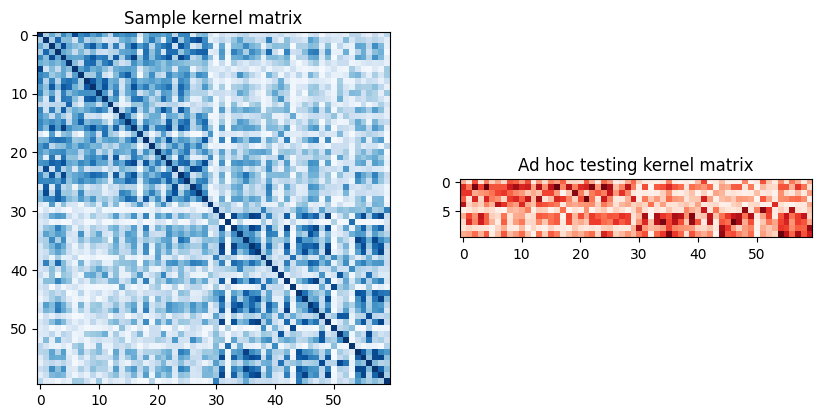

In [21]:

adhoc_matrix_train = adhoc_kernel.evaluate(x_vec=train_features)
adhoc_matrix_test = adhoc_kernel.evaluate(x_vec=test_features, y_vec=train_features)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].imshow(
    np.asmatrix(adhoc_matrix_train), interpolation="nearest", origin="upper", cmap="Blues"
)
axs[0].set_title("Sample kernel matrix")

axs[1].imshow(np.asmatrix(adhoc_matrix_test), interpolation="nearest", origin="upper", cmap="Reds")
axs[1].set_title("Ad hoc testing kernel matrix")

plt.show()

In [23]:
from sklearn import svm
adhoc_svc = svm.SVC(kernel="precomputed")

adhoc_svc.fit(adhoc_matrix_train, train_labels)

adhoc_score_precomputed_kernel = adhoc_svc.score(adhoc_matrix_test, test_labels)

print(f"Precomputed kernel classification test score: {adhoc_score_precomputed_kernel}")

Precomputed kernel classification test score: 1.0
